# KNN assignment

In [1]:
import pandas as pd

df=pd.read_csv("Zoo.csv")
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
df.shape

(101, 18)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
 df.drop(['animal name'],axis=1,inplace=True)

In [5]:

x = df.drop(['type'],axis=1)
y = df['type']


Observation for optimal k value

---



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

train_accuracy_list = []
test_accuracy_list = []

for k in range(1,15,1):
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred_train = knn.predict(x_train)
  y_pred_test = knn.predict(x_test)
  train_accuracy_list.append(accuracy_score(y_train,y_pred_train))
  test_accuracy_list.append(accuracy_score(y_test,y_pred_test))
K_observation=pd.DataFrame({'k':range(1,15,1),'train_accuracy':train_accuracy_list,'test_accuracy':test_accuracy_list})
K_observation


,k,train_accuracy,test_accuracy
0,1,1.0000,1.000000
1,2,1.0000,1.000000
2,3,0.9625,1.000000
3,4,0.9375,1.000000
4,5,0.9375,0.952381
5,6,0.9125,0.952381
6,7,0.8875,0.952381
7,8,0.8625,0.952381
8,9,0.8375,0.952381
9,10,0.7625,0.904762


<Axes: xlabel='k'>

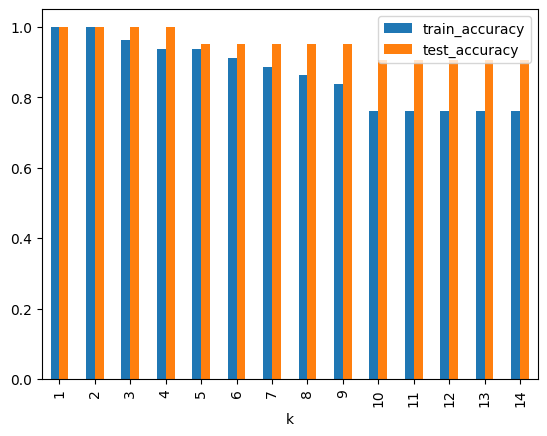

In [19]:


K_observation.plot.bar(x='k', y=['train_accuracy', 'test_accuracy'])


In [20]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

train_accuracy_list = []

test_accuracy_list = []
test_f1_score_list = []
test_recall_score_list = []
test_precision_score_list = []



for i in range(1,10,1):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)

  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(x_train,y_train)

  y_pred_train = knn.predict(x_train)
  y_pred_test = knn.predict(x_test)



  train_accuracy_list.append(accuracy_score(y_train,y_pred_train))
  test_accuracy_list.append(accuracy_score(y_test,y_pred_test))

  f1Score=f1_score(y_test, y_pred_test, average='weighted')
  recallScore=recall_score(y_test, y_pred_test, average='weighted', zero_division=0 )
  precisionScore=precision_score(y_test, y_pred_test, average='weighted', zero_division=0)


  test_f1_score_list.append(f1Score)
  test_recall_score_list.append(recallScore)
  test_precision_score_list.append(precisionScore)


print("avg_train accuracy: ", np.mean(train_accuracy_list).round(3))
print("avg_test accuracy: ", np.mean(test_accuracy_list).round(3))

print("avg_test F1 score: ", np.mean(test_f1_score_list).round(3))
print("avg_test recall score: ", np.mean(test_recall_score_list).round(3))
print("avg_test precision score: ", np.mean(test_precision_score_list).round(3))








avg_train accuracy:  0.925
avg_test accuracy:  0.905
avg_test F1 score:  0.894
avg_test recall score:  0.905
avg_test precision score:  0.91


## Visualize the decision boundaries of the classifier.

<ipython-input-22-8a296567cf1a>:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x')


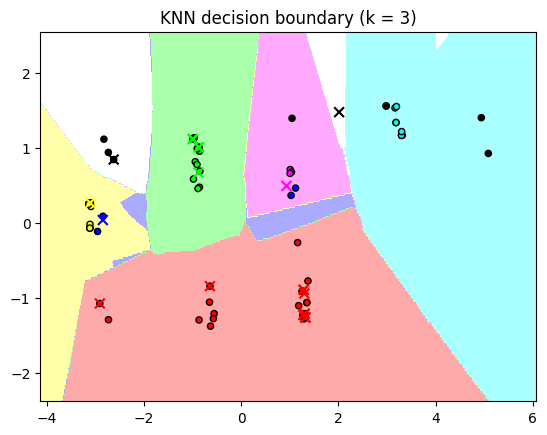

In [22]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=1)
knn.fit(x_train, y_train)

# Create a mesh grid
h = .02
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAAFF', '#AAFFFF', '#FFFFFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#000000'])

plt.contourf(xx, yy, Z, cmap=cmap_light)


plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='x')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN decision boundary (k = %i)" % 3)

plt.show()


## Interview Questions:

1. What are the key hyperparameters in KNN?

A k-nearest neighbors is algorithm used for classification and regression. It classifies a new data point by finding the k-nearest points in the training dataset and assigns it the majority class among those neighbors. Machine learning algorithms have hyperparameters that allow you to tailor the behavior of the algorithm to your specific dataset. Hyperparameters Tuning can improve model performance by about 20% to a range of 77% for all evaluation matrices. Hyperparameter tuning in k-nearest neighbors (KNN) is important because it allows us to optimize the performance of the model. The KNN algorithm has several hyperparameters that can significantly affect the accuracy of the model, such as the number of nearest neighbors to consider (k), the distance metric used to measure similarity, and the weighting scheme used to aggregate the labels of the nearest neighbors.

2. What distance metrics can be used in KNN?

1 Euclidean distance 2 Manhattan distance 3 Minkowski distance 4 Cosine similarity

How to choose the best distance metric

When selecting a distance metric to optimize your KNN algorithm, there is no one-size-fits-all solution. However, you can use some general guidelines to help you make the best choice. Analyzing your data and understanding the type, scale, range, and distribution of your features is essential. Experimenting with different distance metrics and comparing their results and performance on your data and problem is also key. Cross-validation and other evaluation methods can help measure the accuracy and quality of your KNN algorithm with different distance metrics. Additionally, consider the computational complexity and interpretability of the distance metrics, as well as how they affect your KNN algorithm. Lastly, try to use domain knowledge and intuition to select a distance metric that makes sense for your data and problem.